In [4]:
import pydicom
from pydicom.pixel_data_handlers.util import apply_voi_lut
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from glob import glob
# from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from skimage import exposure
import cv2
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

def read_xray(path, voi_lut = True, fix_monochrome = True):
    dicom = pydicom.read_file(path)
    
    # VOI LUT（如果DICOM设备可用）用于将原始DICOM数据转换为“人性化”视图
    if voi_lut:
        data = apply_voi_lut(dicom.pixel_array, dicom)
    else:
        data = dicom.pixel_array
               
    # 根据这个值，X射线可能看起来是反向的修复这个问题:
    if fix_monochrome and dicom.PhotometricInterpretation == "MONOCHROME1":
        data = np.amax(data) - data
        
    data = data - np.min(data)
    data = data / np.max(data)
    data = (data * 255).astype(np.uint8)
        
    return data

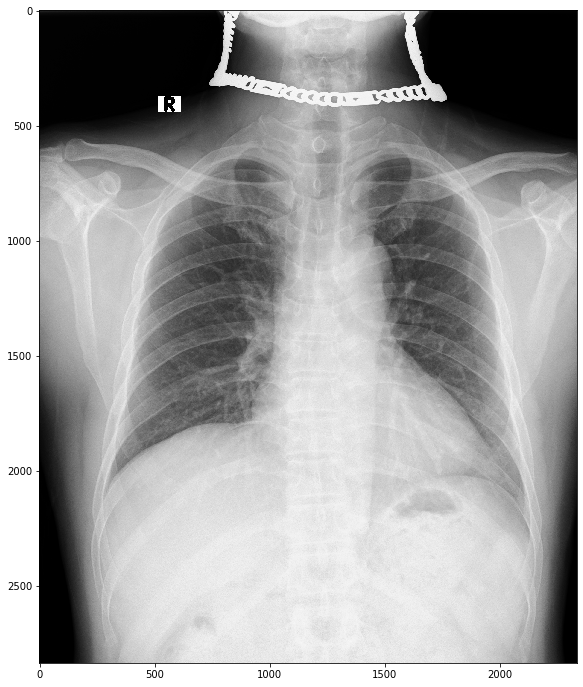

In [13]:
img = read_xray('datasets/000434271f63a053c4128a0ba6352c7f.dicom')
plt.figure(figsize = (12,12))
plt.imshow(img, 'gray')
